In [49]:
import numpy as np
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras import optimizers

In [51]:
traindf = pd.read_csv("train_fare.csv")
testdf = pd.read_csv("test_fare.csv")
traindf

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight
0,4.50,-73.844311,40.721319,-73.841610,40.712278,1,1,6,15,2,17,0,0,0
1,16.90,-74.016048,40.711303,-73.979268,40.782004,1,2,1,5,3,16,0,0,0
2,5.70,-73.982738,40.761270,-73.991242,40.750562,2,3,8,18,5,0,0,0,1
3,7.70,-73.987130,40.733143,-73.991567,40.758092,1,4,4,21,7,4,0,1,0
4,5.30,-73.968095,40.768008,-73.956655,40.783762,1,2,3,9,3,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,8.10,-73.996214,40.726749,-74.009943,40.709942,1,3,7,7,5,9,1,0,0
1048571,9.70,-73.983244,40.730378,-73.956887,40.766790,2,2,1,24,1,19,0,0,1
1048572,6.90,-73.983217,40.767932,-73.984292,40.754990,1,3,5,23,2,12,1,0,0
1048573,30.27,-73.997512,40.683585,-73.955395,40.582122,5,5,8,25,1,11,1,0,0


In [52]:
testdf

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight
0,-73.973320,40.763805,-73.981430,40.743835,1,7,1,27,3,13,1,0,0
1,-73.986862,40.719383,-73.998886,40.739201,1,7,1,27,3,13,1,0,0
2,-73.982524,40.751260,-73.979654,40.746139,1,3,10,8,7,11,1,0,0
3,-73.981160,40.767807,-73.990448,40.751635,1,4,12,1,7,21,0,0,1
4,-73.966046,40.789775,-73.988565,40.744427,1,4,12,1,7,21,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6,7,5,10,1,12,1,0,0
9910,-73.945511,40.803600,-73.960213,40.776371,6,7,1,12,2,17,0,0,0
9911,-73.991600,40.726608,-73.789742,40.647011,6,7,4,19,1,20,0,0,1
9912,-73.985573,40.735432,-73.939178,40.801731,6,7,1,31,7,1,0,0,1


In [53]:
def clean(df):
    df = df[(0<df['fare_amount']) & (df['fare_amount'] <= 250)]
    df = df[(df['dropoff_longitude'] != df['pickup_longitude'])]
    df = df[(df['dropoff_latitude']!= df['pickup_latitude'])]

    return df

In [57]:
traindf = clean(traindf)

In [59]:
traindf

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight
0,4.50,-73.844311,40.721319,-73.841610,40.712278,1,1,6,15,2,17,0,0,0
1,16.90,-74.016048,40.711303,-73.979268,40.782004,1,2,1,5,3,16,0,0,0
2,5.70,-73.982738,40.761270,-73.991242,40.750562,2,3,8,18,5,0,0,0,1
3,7.70,-73.987130,40.733143,-73.991567,40.758092,1,4,4,21,7,4,0,1,0
4,5.30,-73.968095,40.768008,-73.956655,40.783762,1,2,3,9,3,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,8.10,-73.996214,40.726749,-74.009943,40.709942,1,3,7,7,5,9,1,0,0
1048571,9.70,-73.983244,40.730378,-73.956887,40.766790,2,2,1,24,1,19,0,0,1
1048572,6.90,-73.983217,40.767932,-73.984292,40.754990,1,3,5,23,2,12,1,0,0
1048573,30.27,-73.997512,40.683585,-73.955395,40.582122,5,5,8,25,1,11,1,0,0


In [61]:
def manhattan(pickup_lat, pickup_long, dropoff_lat, dropoff_long):
    return np.abs(dropoff_lat-pickup_lat) + np.abs(dropoff_long-pickup_long)

def add_coordinate_features(df):
    lat1= df['pickup_latitude']
    lat2= df['dropoff_latitude']
    lon1= df['pickup_longitude']
    lon2= df['dropoff_longitude']


    df['latdiff']=(lat1-lat2)
    df['londiff']=(lon1-lon2)

    return df

def add_distances_features(df):
    jfk =(-73.782222, 40.644166667)
    ewr =(-74.175, 40.69)
    lgr =(-73.87, 40.7741667)
    ny = (-74.0063889, 40.7141667)

    lat1= df['pickup_latitude']
    lat2= df['dropoff_latitude']
    lon1= df['pickup_longitude']
    lon2= df['dropoff_longitude']

    df['euclidean']=(df['latdiff']** 2+ df['londiff']** 2) **0.5
    df['manhattam']= manhattam(lat1, lon1, lat2, lon2)

    df['downtown_pickup_distance'] = manhattan(ny[1], ny[0], lat1, lon1)
    df['downtown_dropoff_distance'] = manhattan (ny[1], ny[0], lat2, lon2)
    df['jfk_pickup_distance'] = manhattan(jfk[1], jfk[0], lat1, lon1)
    df['jfk_dropoff_distance'] = manhattan(jfk[1], jfk[0], lat2, lon2)
    df['ewr_pickup_distance'] = manhattan(jfk[1], jfk[0], lat1, lon1)
    df['ewr_dropoff_distance'] = manhattan(jfk[1], jfk[0], lat1, lon2)
    df['lgr_pickup_distance'] = manhattan(lgr[1], lgr[0], lat1, lon1)
    df['lgr_pickup_distance'] = manhattan(lgr[1], lgr[0], lat1, lon2)

    return df

In [63]:
add_coordinate_features(traindf)
add_coordinate_features(testdf)

traindf = add_coordinate_features(traindf)
testdf = add_coordinate_features(testdf)

traindf.head(5)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight,latdiff,londiff
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1,6,15,2,17,0,0,0,0.009041,-0.002701
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2,1,5,3,16,0,0,0,-0.070701,-0.036780
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,3,8,18,5,0,0,0,1,0.010708,0.008504
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,4,21,7,4,0,1,0,-0.024949,0.004437
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2,3,9,3,7,0,1,0,-0.015754,-0.011440


In [65]:
drop_columns = ['pickup_longitude', 'pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']
train_clean = traindf.drop(drop_columns, axis=1)
test_clean =  testdf.drop(drop_columns, axis=1)

train_clean.head()

,fare_amount,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight,latdiff,londiff
0,4.5,1,6,15,2,17,0,0,0,0.009041,-0.002701
1,16.9,2,1,5,3,16,0,0,0,-0.070701,-0.036780
2,5.7,3,8,18,5,0,0,0,1,0.010708,0.008504
3,7.7,4,4,21,7,4,0,1,0,-0.024949,0.004437
4,5.3,2,3,9,3,7,0,1,0,-0.015754,-0.011440


In [67]:
test_clean.head()

,year,month,day,dayOfWeek,hour,timeOfDayMid.Day,timeOfDayMorning,timeOfDayNight,latdiff,londiff
0,7,1,27,3,13,1,0,0,0.019970,0.008110
1,7,1,27,3,13,1,0,0,-0.019817,0.012024
2,3,10,8,7,11,1,0,0,0.005121,-0.002870
3,4,12,1,7,21,0,0,1,0.016172,0.009288
4,4,12,1,7,21,0,0,1,0.045348,0.022519


In [69]:
train_df, validate_df = train_test_split(train_clean, test_size=0.10, random_state=1)

train_labels = train_df['fare_amount'].values
validate_labels = validate_df['fare_amount'].values
train_df = train_df.drop(['fare_amount'], axis=1)
validate_df = validate_df.drop(['fare_amount'], axis=1)


In [71]:
sc = preprocessing.MinMaxScaler()
train_df_sc = sc.fit_transform(train_df)
validate_df_sc = sc.fit_transform(validate_df)
test_sc = sc.transform(test_clean)

In [81]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim = train_df_sc.shape[1]))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile (loss='mse', optimizer='adam', metrics=['mae'])


C:\Users\dhava\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
history = model.fit(x=train_df_sc, y=train_labels, batch_size=256,  epochs=50, verbose=1, validation_data=(validate_df_sc, validate_labels),shuffle = True)

Epoch 1/50
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 47.1729 - mae: 4.8796 - val_loss: 404.6319 - val_mae: 18.8993
Epoch 2/50
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 11.1987 - mae: 2.2247 - val_loss: 1645.3616 - val_mae: 39.7936
Epoch 3/50
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 7.6081 - mae: 1.7389 - val_loss: 1940.4586 - val_mae: 43.4252
Epoch 4/50
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 7.4143 - mae: 1.6966 - val_loss: 974.7969 - val_mae: 30.4003
Epoch 5/50
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 7.3079 - mae: 1.6724 - val_loss: 1205.6125 - val_mae: 33.9885
Epoch 6/50
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 7.2093 - mae: 1.6540 - val_loss: 879.7020 - val_mae: 28.7989
Epoch 7/50
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 7.0913 - mae: 1.6361 - val_loss: 1692.2975 - val_mae: 40.4459
Epoch 8/50
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 7.0728 - mae: 1.6299 - val_loss: 1304.6304 - val_mae: 35.4082
E

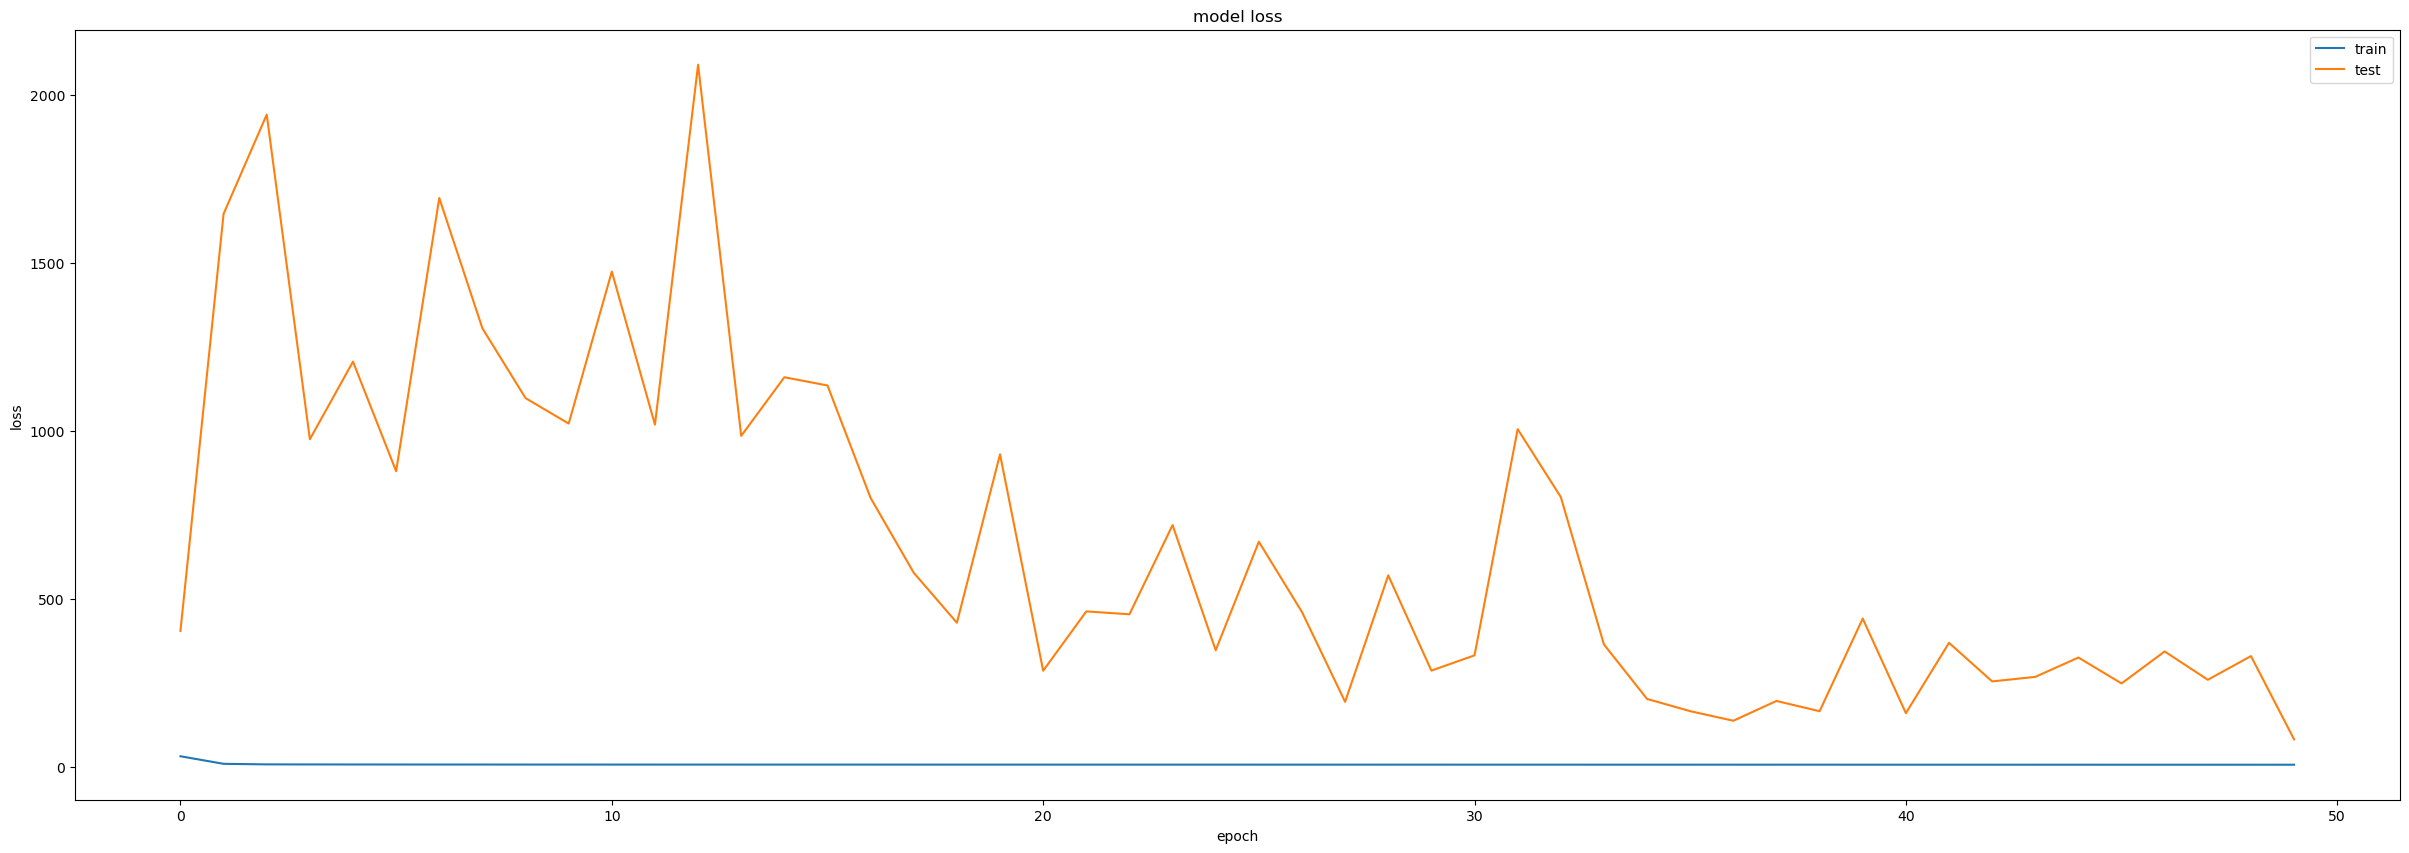

In [100]:
plt.figure(figsize=(30,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [93]:
predictions = model.predict(test_sc, batch_size=128, verbose=1)

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [128]:
def output_sub(raw_test, prediction, prediction_column, file_name):
    df = pd.DataFrame(prediction, columns=[prediction_column])
    df[[prediction_column]].to_csv((file_name), index=False)
    print('Output complete')

In [130]:
output_sub(testdf, predictions, 'fare_amount', 'predictions.csv')

Output complete
